### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This df was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan df for National retail volume (units) and price. Retail scan df comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail df set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dfset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
PLU 4046	 - Total number of avocados with PLU PLU 4046	 sold
PLU 4225 - Total number of avocados with PLU PLU 4225 sold
PLU 4770 - Total number of avocados with PLU PLU 4770 sold


Inspiration /Label 

The dfset can be seen in two angles to find the region and find the average price .
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

In [2]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.drop(df.columns[0],axis = 1,inplace = True)

In [10]:
#In the given dataset date is a object type so changing into the date format


df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
#Rename the column

df=df.rename(columns={'PLU 4046	':'PLU PLU 4046	','PLU 4225':'PLU PLU 4225','PLU 4770':'PLU PLU 4770'})

In [13]:
df.head()

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [11]:
from sklearn.preprocessing import LabelEncoder 

In [12]:
lencode = LabelEncoder()
df["region"] = lencode.fit_transform(df["region"])

In [13]:
lencode = LabelEncoder()
df["type"] = lencode.fit_transform(df["type"])

In [14]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


### Data Visualization

<AxesSubplot:>

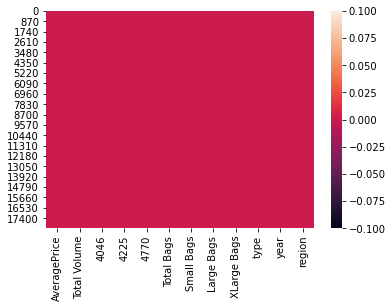

In [15]:
sns.heatmap(df.isnull())

Has we see in the heatmap there in no null values in the dfset so no need of handling of null values


47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

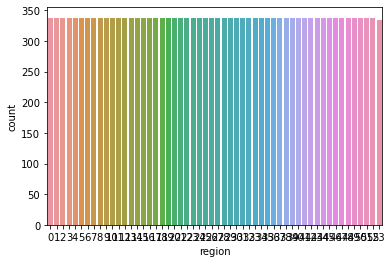

In [16]:
sns.countplot(df['region'])
df['region'].value_counts()

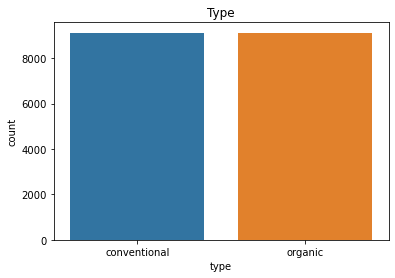

In [14]:
#Visualization

sns.countplot(x="type",data=df)
plt.title("Type")
plt.show()

As per the above countplot we can see the target df is balanced no need to balance the df in the target column

In [15]:
#mean of price every year

df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

2017 year is the highest year where price is high

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

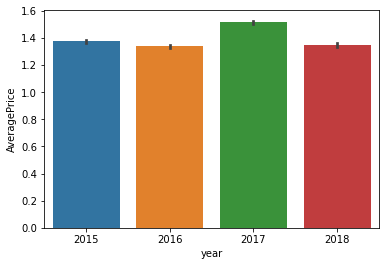

In [17]:
sns.barplot(x='year',y='AveragePrice',data=df)

averprice is more in year 2017

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

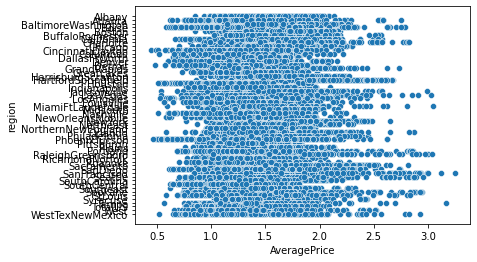

In [18]:
sns.scatterplot(data = df, x = 'AveragePrice',y = 'region')

<AxesSubplot:xlabel='Total Volume', ylabel='region'>

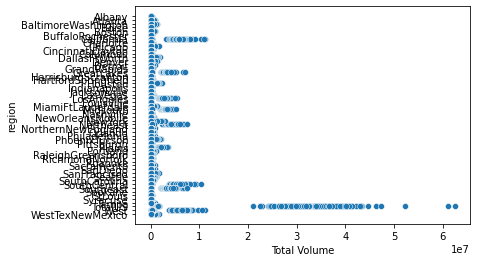

In [21]:
sns.scatterplot(data = df, x = 'Total Volume',y = 'region')

<AxesSubplot:xlabel='PLU 4046', ylabel='region'>

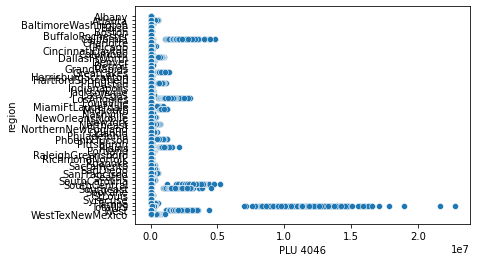

In [22]:
sns.scatterplot(data = df, x = 'PLU 4046',y = 'region')

<AxesSubplot:xlabel='PLU 4225', ylabel='region'>

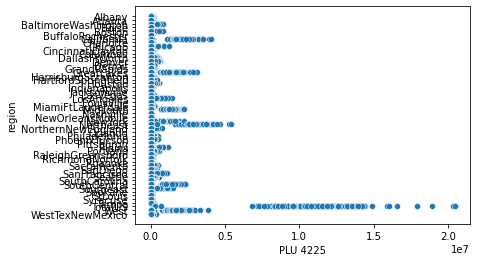

In [23]:
sns.scatterplot(data = df, x = 'PLU 4225',y = 'region')

<AxesSubplot:xlabel='PLU 4770', ylabel='region'>

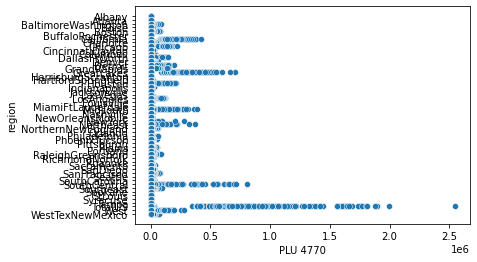

In [24]:
sns.scatterplot(data = df, x = 'PLU 4770',y = 'region')

<AxesSubplot:xlabel='Total Bags', ylabel='region'>

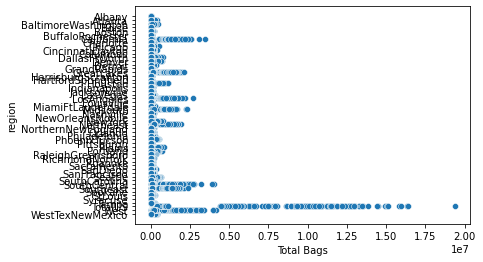

In [25]:
sns.scatterplot(data = df, x = 'Total Bags',y = 'region')

<AxesSubplot:xlabel='Small Bags', ylabel='region'>

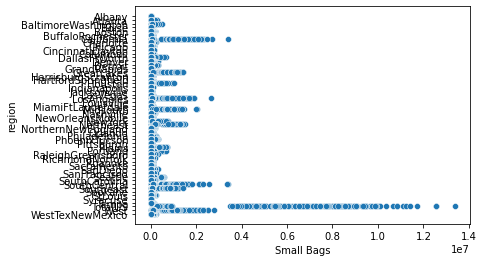

In [26]:
sns.scatterplot(data = df, x = 'Small Bags',y = 'region')

<AxesSubplot:xlabel='Large Bags', ylabel='region'>

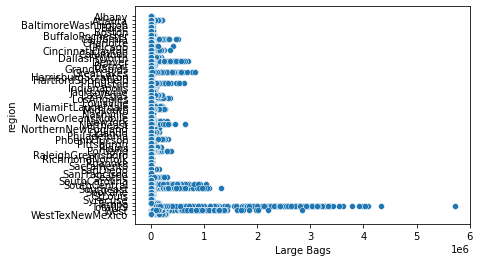

In [27]:
sns.scatterplot(data = df, x = 'Large Bags',y = 'region')

<AxesSubplot:xlabel='XLarge Bags', ylabel='region'>

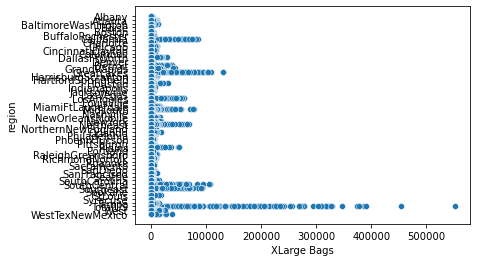

In [28]:
sns.scatterplot(data = df, x = 'XLarge Bags',y = 'region')

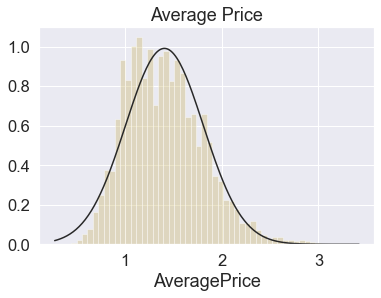

In [29]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
sns.distplot(a=df.AveragePrice,kde=False,color='y',fit=norm)
plt.title("Average Price")
plt.show()

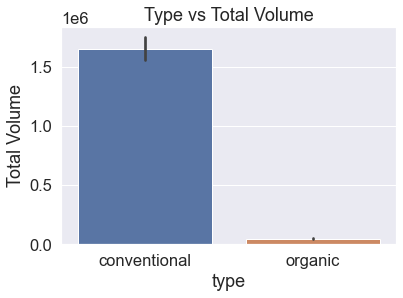

In [30]:
#checking which conventional type having more average price


sns.barplot(x='type',y='Total Volume',data=df)
plt.title("Type vs Total Volume")
plt.show()

The graph shows the organic type volume is very less compare to conventional type

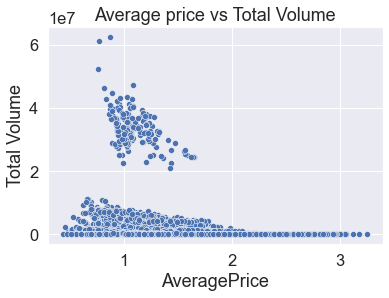

In [31]:
sns.scatterplot(x='AveragePrice',y='Total Volume',data=df)
plt.title("Average price vs Total Volume")
plt.show()

As volume increases the average price decreases

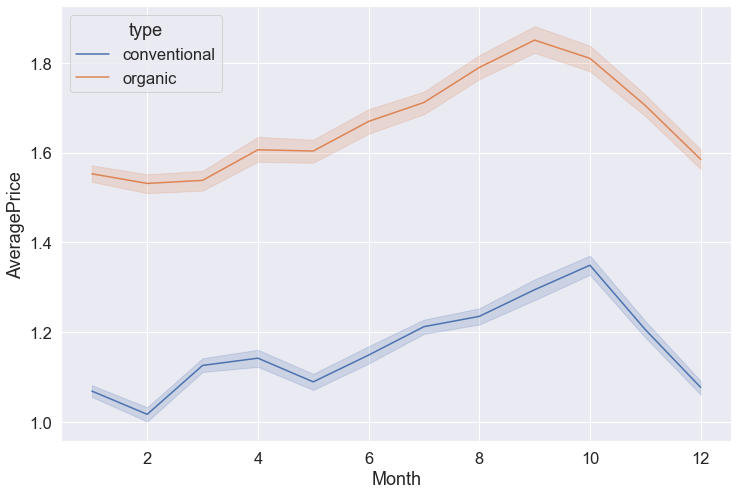

In [33]:
#How Avg price changes monthly for both conventional and organic
plt.figure(figsize=(12,8))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

As the graph shows both conventional and organic gives hike in the month of 8-10 

In [34]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

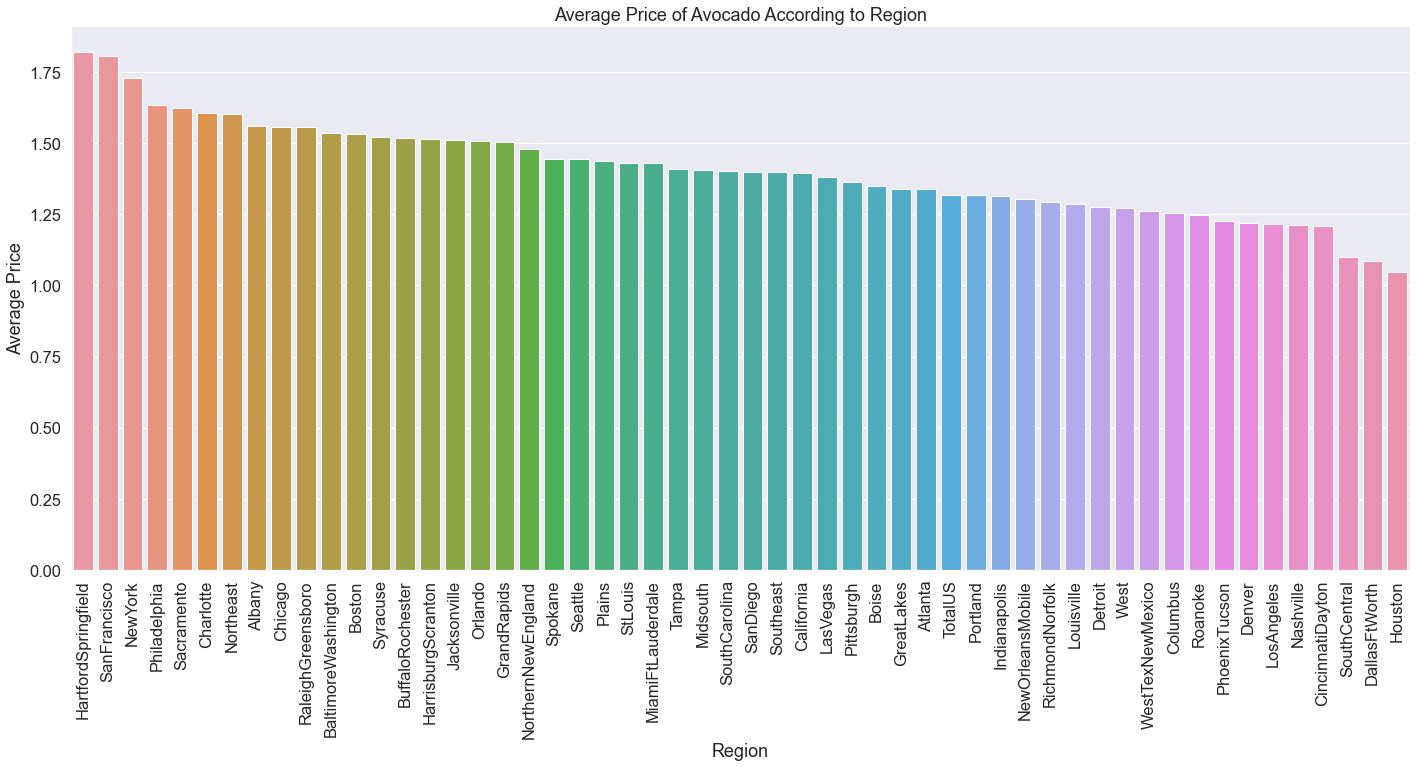

In [35]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

According to the graph top 5 regions are:
    hartfordSpringfield
    SanFranscisco
    Newyork
    Philidelphia
    sacramento

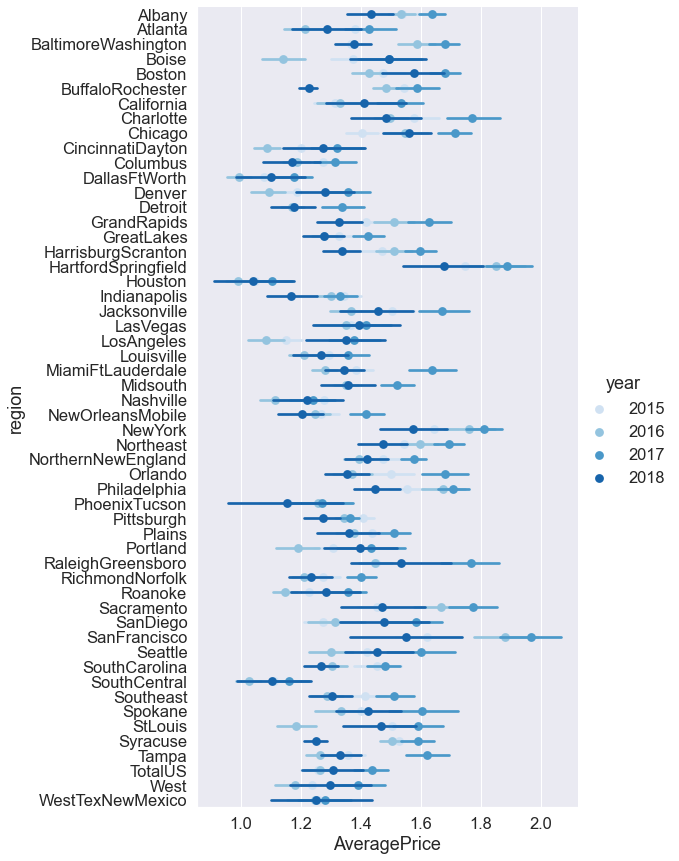

In [38]:
#Year which average price is high

sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=12,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

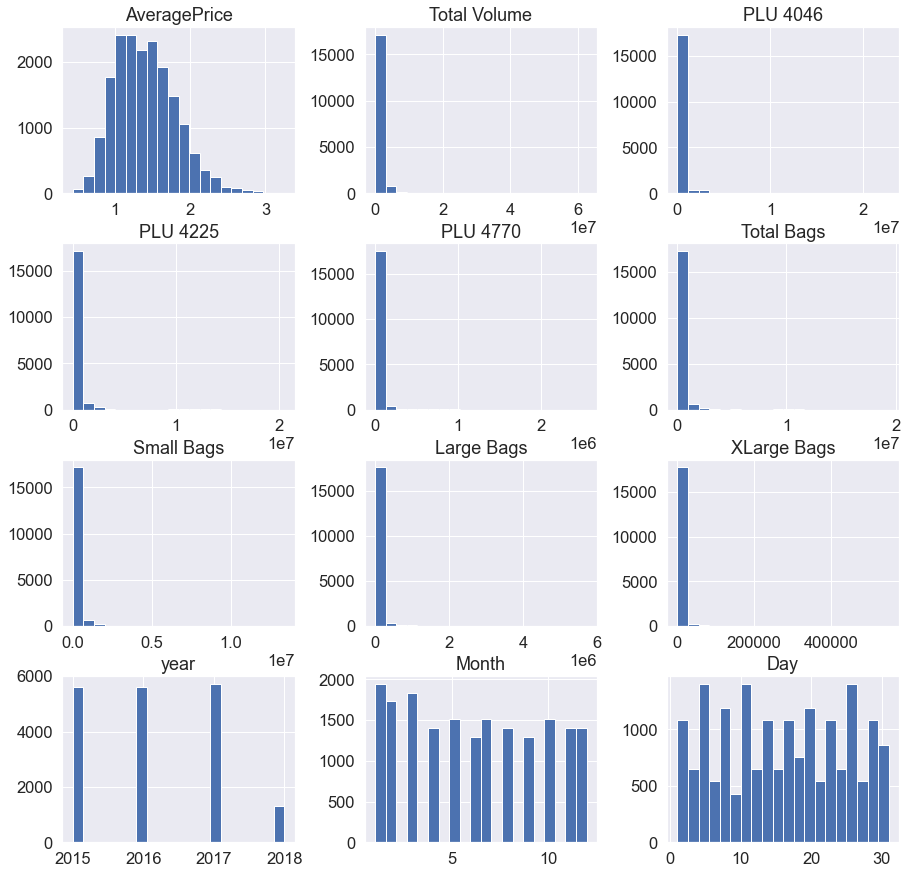

In [39]:
df.hist(bins=20,figsize=(15,15))
plt.show()

### To check the correlation

In [40]:
corr = df.corr()
corr

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
PLU 4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
PLU 4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
PLU 4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

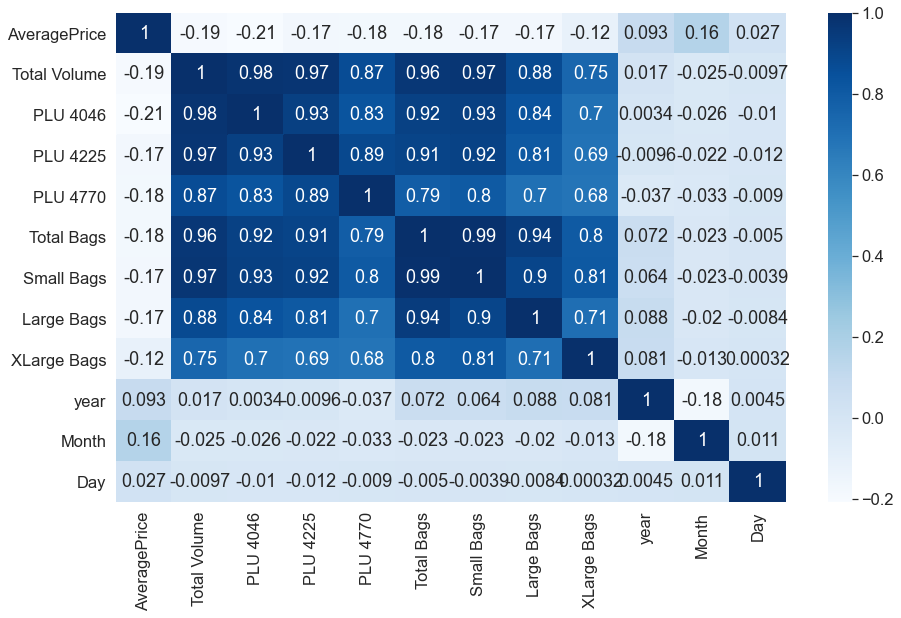

In [41]:
plt.figure(figsize = (15,9))
sns.heatmap(corr,cmap = 'Blues',annot = True)

The graph shows that the average price is not correlated with all other variables and already we have year month and day so remove the date column

array([<AxesSubplot:title={'center':'AveragePrice'}>,
       <AxesSubplot:title={'center':'Total Volume'}>,
       <AxesSubplot:title={'center':'PLU 4046'}>,
       <AxesSubplot:title={'center':'PLU 4225'}>,
       <AxesSubplot:title={'center':'PLU 4770'}>,
       <AxesSubplot:title={'center':'Total Bags'}>,
       <AxesSubplot:title={'center':'Small Bags'}>,
       <AxesSubplot:title={'center':'Large Bags'}>,
       <AxesSubplot:title={'center':'XLarge Bags'}>,
       <AxesSubplot:title={'center':'year'}>,
       <AxesSubplot:title={'center':'Month'}>,
       <AxesSubplot:title={'center':'Day'}>], dtype=object)

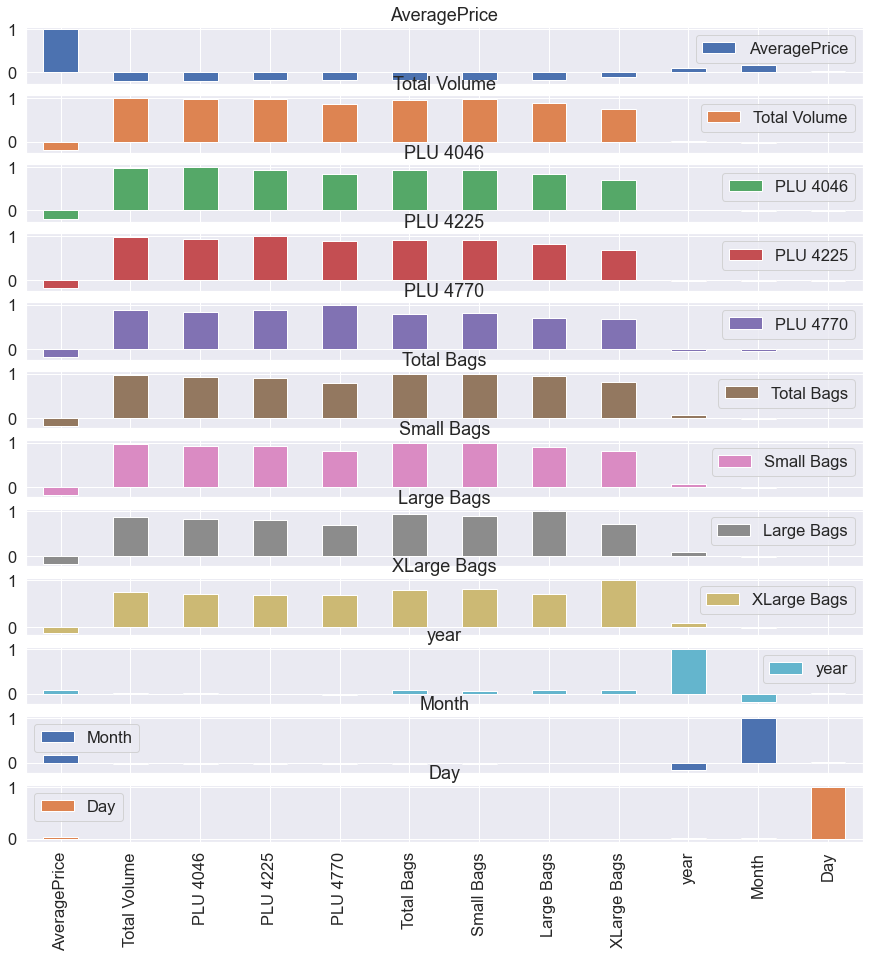

In [42]:
corr.plot(kind = 'bar',subplots = True,figsize = (15,15) )

In [44]:
df['region'].nunique()

54

In [45]:
df['type'].nunique()

2

As the above two shows type and region unique values where type is easily converted but region its very difficult so better remove the region type

In [46]:
df_1=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df_1

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [47]:
print(df_1['type_organic'].value_counts())

0    9126
1    9123
Name: type_organic, dtype: int64


### plotting Outliers

In [48]:
df_1.columns

Index(['AveragePrice', 'Total Volume', 'PLU 4046', 'PLU 4225', 'PLU 4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'Month', 'Day', 'type_organic'],
      dtype='object')

AveragePrice       AxesSubplot(0.125,0.125;0.0503247x0.755)
Total Volume     AxesSubplot(0.18539,0.125;0.0503247x0.755)
PLU 4046        AxesSubplot(0.245779,0.125;0.0503247x0.755)
PLU 4225        AxesSubplot(0.306169,0.125;0.0503247x0.755)
PLU 4770        AxesSubplot(0.366558,0.125;0.0503247x0.755)
Total Bags      AxesSubplot(0.426948,0.125;0.0503247x0.755)
Small Bags      AxesSubplot(0.487338,0.125;0.0503247x0.755)
Large Bags      AxesSubplot(0.547727,0.125;0.0503247x0.755)
XLarge Bags     AxesSubplot(0.608117,0.125;0.0503247x0.755)
year            AxesSubplot(0.668506,0.125;0.0503247x0.755)
Month           AxesSubplot(0.728896,0.125;0.0503247x0.755)
Day             AxesSubplot(0.789286,0.125;0.0503247x0.755)
type_organic    AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

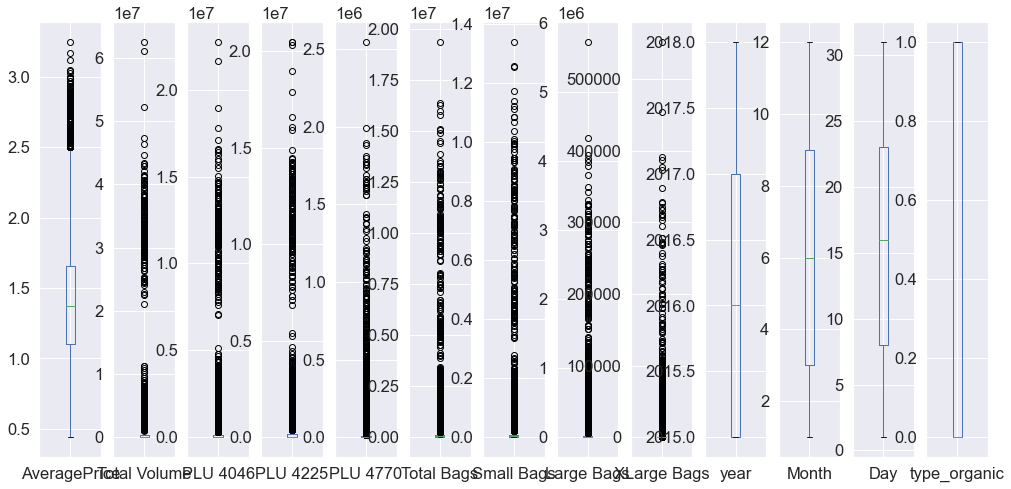

In [49]:
df_1.plot(kind = 'box',subplots = True,figsize = (17,8))

### Removing outliers 

In [50]:
from scipy.stats import zscore
z = np.abs(zscore(df_1))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.64763162, 1.29185687,
        0.99983562],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.64763162, 0.49423066,
        0.99983562],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.64763162, 0.30339555,
        0.99983562],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.46495942, 0.60817726,
        1.00016441],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.46495942, 0.18944895,
        1.00016441],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.46495942, 0.98707516,
        1.00016441]])

In [51]:
thresold = 3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [54]:
df_new = df_1[(z<3).all(axis = 1)]
print(df_1.shape)
print(df_new.shape)

(18249, 13)
(17651, 13)


### Percentage of loss

In [55]:
loss = (18249-17651)/18249*100
print(loss)

3.276891884486821


In [56]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
PLU 4046        4.909848
PLU 4225        4.455745
PLU 4770        5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
Day             0.011778
type_organic   -0.037741
dtype: float64

Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags all are positively skweed

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

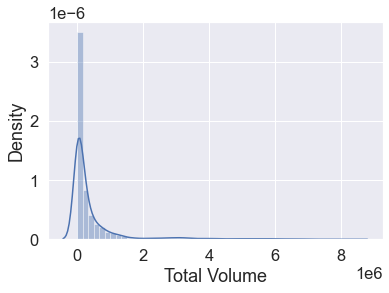

In [57]:
sns.distplot(df_new['Total Volume'])

<AxesSubplot:xlabel='PLU 4046', ylabel='Density'>

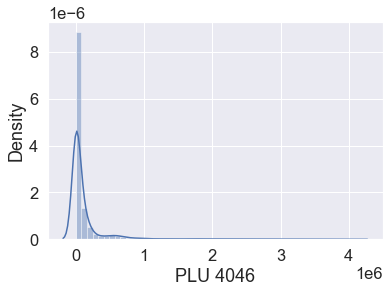

In [58]:
sns.distplot(df_new['PLU 4046'])

<AxesSubplot:xlabel='PLU 4225', ylabel='Density'>

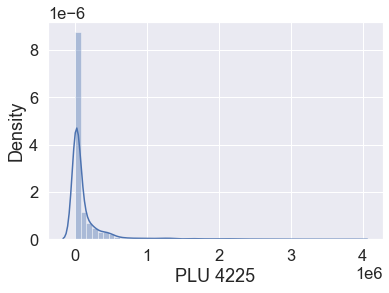

In [59]:
sns.distplot(df_new['PLU 4225'])

<AxesSubplot:xlabel='PLU 4770', ylabel='Density'>

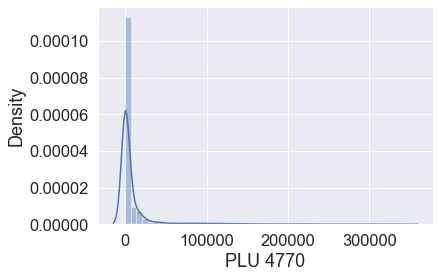

In [60]:
sns.distplot(df_new['PLU 4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

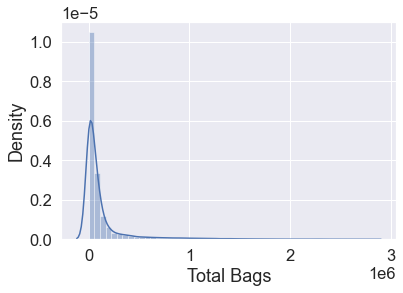

In [61]:
sns.distplot(df_new['Total Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

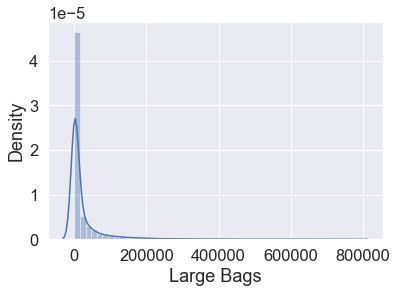

In [62]:
sns.distplot(df_new['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

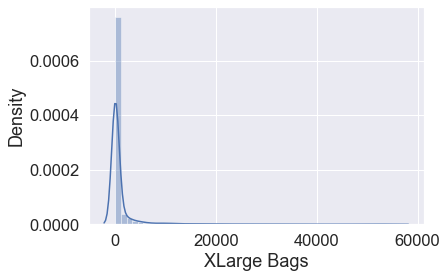

In [63]:
sns.distplot(df_new['XLarge Bags'])

In [67]:
x = df_new.iloc[:,1:]
x

,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [68]:
x.shape

(17651, 12)

In [72]:
y = df_new.iloc[:,0]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [73]:
y.shape

(17651,)

In [74]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [75]:
x

array([[-0.07532391, -0.65742071,  0.35142978, ...,  1.49138301,
         1.22756521, -1.01904715],
       [-0.14749743, -0.77717852,  0.26951276, ...,  1.49138301,
         0.53822879, -1.01904715],
       [ 0.20555557, -0.7317763 ,  0.64933326, ...,  1.49138301,
        -0.21895878, -1.01904715],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ..., -1.64028838,
         0.64019459,  0.98130886],
       [-0.70179733, -0.54701087, -0.71637127, ..., -1.64028838,
        -0.10529902,  0.98130886],
       [-0.66738095, -0.35967077, -0.79165015, ..., -1.64028838,
        -0.9581001 ,  0.98130886]])

In [76]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.55893336, 0.35498056, 0.57757163, ..., 1.        , 0.89350443,
        0.        ],
       [0.54510426, 0.32886287, 0.5614532 , ..., 1.        , 0.69625586,
        0.        ],
       [0.61275241, 0.33876453, 0.63618871, ..., 1.        , 0.47959219,
        0.        ],
       ...,
       [0.42481659, 0.36358503, 0.35516323, ..., 0.        , 0.72543263,
        1.        ],
       [0.43889538, 0.37905957, 0.36746539, ..., 0.        , 0.5121151 ,
        1.        ],
       [0.44548987, 0.41991611, 0.35265312, ..., 0.        , 0.26809232,
        1.        ]])

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [88]:
for i in range(0,3000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random score",i,"Model Performance is very well")
        print("Random stata is:",i)
        print("Train Score",r2_score(y_train,pred_train)*100)
        print("Test Score",r2_score(y_test,pred_test)*100)

At Random score 24 Model Performance is very well
Random stata is: 24
Train Score 56.57097746905031
Test Score 56.57368116304551
At Random score 73 Model Performance is very well
Random stata is: 73
Train Score 56.56935161947225
Test Score 56.57238943729554
At Random score 77 Model Performance is very well
Random stata is: 77
Train Score 56.571665472356884
Test Score 56.56888305265522
At Random score 200 Model Performance is very well
Random stata is: 200
Train Score 56.570702810147885
Test Score 56.56982165279276
At Random score 559 Model Performance is very well
Random stata is: 559
Train Score 56.57149816701299
Test Score 56.56631985333439
At Random score 1167 Model Performance is very well
Random stata is: 1167
Train Score 56.573727467879344
Test Score 56.57010236049209
At Random score 1213 Model Performance is very well
Random stata is: 1213
Train Score 56.571387886190784
Test Score 56.571237628066484
At Random score 1896 Model Performance is very well
Random stata is: 1896
Train 

In [79]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.1983241411142146
Mean Squared Error: 0.06357660681947902
Root Mean Squared Error: 0.25214401999547603


Root Mean Squared Error is low for linear regression model is good

In [81]:
print(lr.coef_)
print(lr.intercept_)
print(lr.score(x_train,y_train))

[-1.49745978e+00  1.13741496e-01  1.33774168e+00  1.00105619e-01
 -1.63806949e+00  1.14573088e+00 -1.25157984e-01 -1.44541832e-03
  3.16554485e-01  2.45966543e-01  3.08844279e-02  3.77216527e-01]
1.4524156060538589
0.5646479695537593


In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preddtr)))

Mean Absolute Error: 0.1354828660436137
Mean Squared Error: 0.043721127159444914
Root Mean Squared Error: 0.20909597595230023


In [89]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predrf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predrf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))

Mean Absolute Error: 0.09930184083828943
Mean Squared Error: 0.019551912432738596
Root Mean Squared Error: 0.13982815321936637


In [91]:
#Gradient Booster Classifier
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)

In [92]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predgbr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predgbr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predgbr)))

Mean Absolute Error: 0.15881434536203312
Mean Squared Error: 0.042317336593701106
Root Mean Squared Error: 0.2057117803960218


In [94]:
print(lr.score(x_train,y_train))
print(dtr.score(x_train,y_train))
print(rf.score(x_train,y_train))
print(gbr.score(x_train,y_train))

0.5646859180050222
0.9429931012175738
0.9814641639349605
0.7339885664856413


by comparing both score and Root Mwan Squared Error random forest classifier model is good 

In [96]:
#cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [98]:
for i in range(3,12):
    score=cross_val_score(lr,x,y,cv=i)
    print("Value of:",i,score.mean())

Value of: 3 0.19457868742997553
Value of: 4 0.15145955294349517
Value of: 5 0.22416094900908384
Value of: 6 0.143429215682909
Value of: 7 0.16909819615592037
Value of: 8 0.16536899771092795
Value of: 9 0.17961519636789444
Value of: 10 0.17192198500359404
Value of: 11 0.17081547980648926


In [99]:
score=cross_val_score(lr,x_train,y_train,cv=10)
score.mean()

0.563113962174749

In [100]:
score=cross_val_score(dtr,x_train,y_train,cv=10)
score.mean()

0.7019941042296708

In [104]:
score=cross_val_score(gbr,x_train,y_train,cv=10)
score.mean()

0.7174938119265842

In [105]:
score=cross_val_score(rf,x_train,y_train,cv=10)
score.mean()

0.8642341094139707

In [106]:
import pickle
filename = "Avocado.pkl"
pickle.dump(rf,open(filename,'wb'))

In [107]:
a = np.array(y_test)
predicted  = np.array(rf.predict(x_test))
df_avocado = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))

In [108]:
df_avocado

,Original,Predicted
0,0.90,1.0175
1,0.81,0.8720
2,1.04,1.0614
3,1.02,1.1060
4,1.24,1.3856
...,...,...
3526,1.44,1.3215
3527,2.27,2.0165
3528,1.25,1.5351
3529,1.50,1.5879


## Target Varaible as Region

In [109]:
df

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [110]:
df = df.drop(['Date'],axis = 1)

In [111]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [112]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])
    df

In [113]:
df

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0,11,26
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0,11,19
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0,11,12
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0,11,5
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,1,3,53,1,3
18245,124,5233,4653,4757,0,5955,5864,2340,0,1,3,53,0,27
18246,140,5203,4654,3928,4712,5985,5961,818,0,1,3,53,0,20
18247,146,5616,5183,4402,4710,6360,6284,901,0,1,3,53,0,13


In [114]:
df.corr()

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.589341,-0.570148,-0.490201,-0.513770,-0.581311,-0.525067,-0.498835,-0.339222,0.615982,0.093216,-0.011796,0.162413,0.027363
Total Volume,-0.589341,1.000000,0.903278,0.940148,0.810884,0.952844,0.928842,0.708302,0.600745,-0.808491,0.085824,0.095988,-0.035493,-0.010503
PLU 4046,-0.570148,0.903278,1.000000,0.793995,0.741457,0.838443,0.826777,0.647191,0.562309,-0.748193,0.011444,0.184896,-0.034158,-0.008767
PLU 4225,-0.490201,0.940148,0.793995,1.000000,0.801623,0.857661,0.838541,0.639056,0.577395,-0.780779,0.006278,0.068547,-0.032171,-0.009521
PLU 4770,-0.513770,0.810884,0.741457,0.801623,1.000000,0.757695,0.767877,0.554446,0.624137,-0.748100,-0.055180,0.050078,-0.032137,-0.005098
Total Bags,-0.581311,0.952844,0.838443,0.857661,0.757695,1.000000,0.962575,0.758396,0.594852,-0.754928,0.205703,0.098432,-0.025145,-0.006285
Small Bags,-0.525067,0.928842,0.826777,0.838541,0.767877,0.962575,1.000000,0.612231,0.590193,-0.757381,0.180780,0.094037,-0.021219,-0.003366
Large Bags,-0.498835,0.708302,0.647191,0.639056,0.554446,0.758396,0.612231,1.000000,0.474620,-0.527684,0.180002,0.121728,-0.027568,-0.005700
XLarge Bags,-0.339222,0.600745,0.562309,0.577395,0.624137,0.594852,0.590193,0.474620,1.000000,-0.561368,0.160041,0.012659,-0.005383,0.004573
type,0.615982,-0.808491,-0.748193,-0.780779,-0.748100,-0.754928,-0.757381,-0.527684,-0.561368,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


<AxesSubplot:>

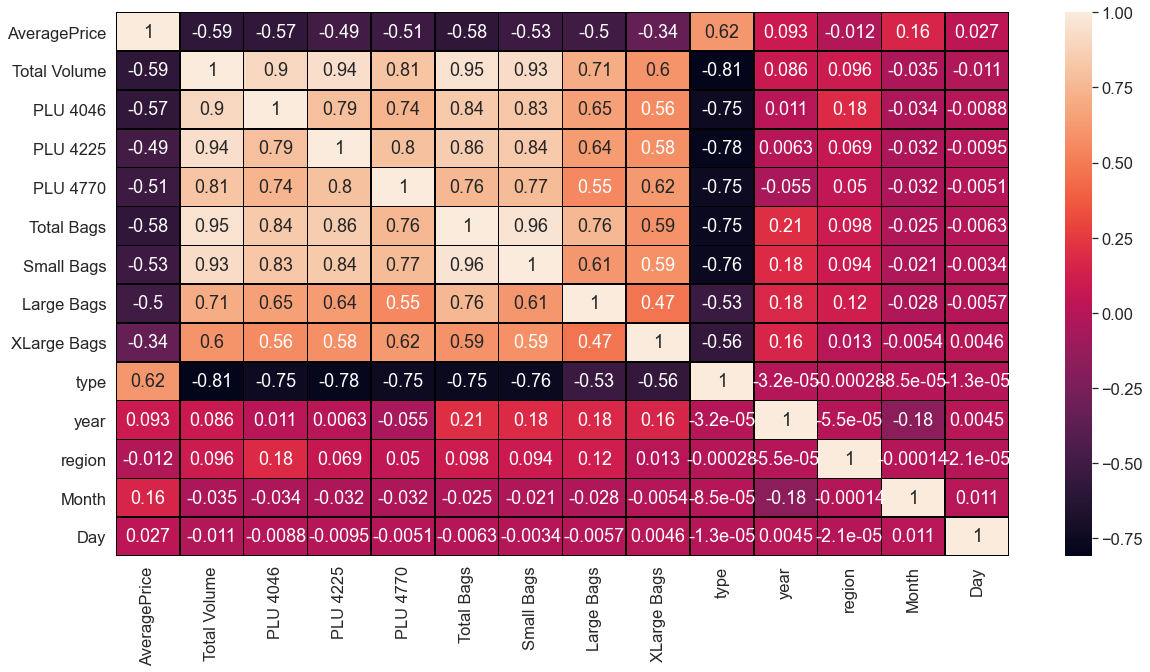

In [116]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True,linewidth = 0.5,linecolor = 'black')

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
PLU 4046         AxesSubplot(0.44569,0.749828;0.133621x0.130172)
PLU 4225        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
PLU 4770        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
type            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
year               AxesSubplot(0.125,0.437414;0.133621x0.130172)
region          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Month            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Day             AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

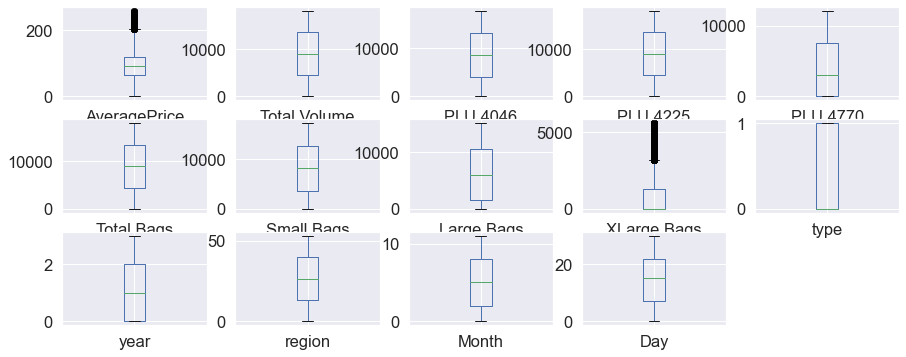

In [119]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

In [120]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.18868869, 0.22480975, 0.80622027, ..., 1.7002522 , 1.64763162,
        1.29185687],
       [0.13900282, 0.27912775, 0.95279724, ..., 1.7002522 , 1.64763162,
        0.49423066],
       [1.18240612, 0.0519082 , 0.90024357, ..., 1.7002522 , 1.64763162,
        0.30339555],
       ...,
       [1.15282984, 0.74291995, 0.75443101, ..., 1.70081131, 1.46495942,
        0.60817726],
       [1.30188745, 0.66448171, 0.65333685, ..., 1.70081131, 1.46495942,
        0.18944895],
       [0.53175644, 0.63162502, 0.39286172, ..., 1.70081131, 1.46495942,
        0.98707516]])

In [121]:
thresold = 3
print(np.where(z>3))

(array([11320, 11321, 11323, 11324, 11325, 11326, 11327, 11328, 11329,
       11330, 11331, 11332, 12821, 12823, 13033, 13035, 13037, 13038,
       13395, 13657, 13661, 14019, 14020, 14073, 14074, 14119, 14120,
       14121, 14122, 14123, 14124, 14125, 14126, 14128, 14129, 14177,
       14385, 14699, 14701, 14702, 14807, 14911, 14912, 14913, 14914,
       14915, 14916, 14917, 14918, 14919, 15124, 15125, 15127, 15128,
       15129, 15130, 15510, 15511, 15667, 15668, 15671, 15673, 15674,
       15814, 15871, 16024, 16050, 16055, 16395, 16399, 16421, 16660,
       16661, 16662, 16663, 16664, 16665, 16666, 16667, 16714, 16715,
       16717, 16718, 16719, 16720, 16721, 16734, 16737, 16738, 16985,
       16986, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17007,
       17008, 17009, 17010, 17015, 17017, 17031, 17032, 17033, 17034,
       17035, 17036, 17037, 17038, 17039, 17040, 17047, 17244, 17245,
       17246, 17247, 17248, 17249, 17250, 17251, 17255, 17300, 17301,
       17302, 17303

In [122]:
df_new1 = df[(z<3).all(axis = 1)]
df_new1

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0,11,26
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0,11,19
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0,11,12
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0,11,5
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,1,3,53,1,3
18245,124,5233,4653,4757,0,5955,5864,2340,0,1,3,53,0,27
18246,140,5203,4654,3928,4712,5985,5961,818,0,1,3,53,0,20
18247,146,5616,5183,4402,4710,6360,6284,901,0,1,3,53,0,13


In [123]:
print(df.shape)
print(df_new1.shape)

(18249, 14)
(18118, 14)


In [127]:
loss1 = (18249-18118)/18249*100
print(loss1)

0.7178475532905912


In [128]:
df_new1.skew()

AveragePrice    0.400323
Total Volume   -0.009983
PLU 4046        0.006429
PLU 4225       -0.006789
PLU 4770        0.500235
Total Bags     -0.003095
Small Bags      0.037888
Large Bags      0.181088
XLarge Bags     1.599287
type            0.014794
year            0.224198
region          0.006878
Month           0.115642
Day             0.014846
dtype: float64

XLargee Bags having highly skewed postively

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

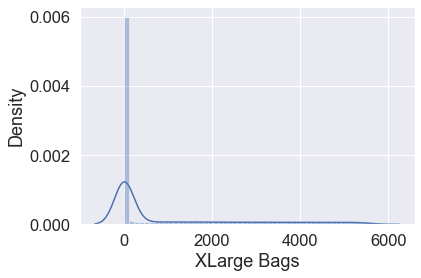

In [129]:
sns.distplot(df_new1['XLarge Bags'])

<AxesSubplot:xlabel='PLU 4046', ylabel='Density'>

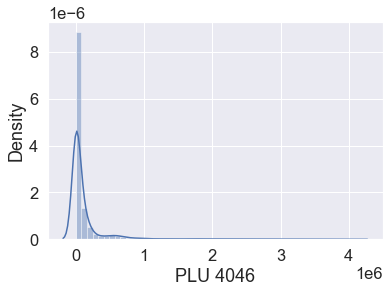

In [216]:
sns.distplot(df_new['PLU 4046'])

<AxesSubplot:xlabel='PLU 4225', ylabel='Density'>

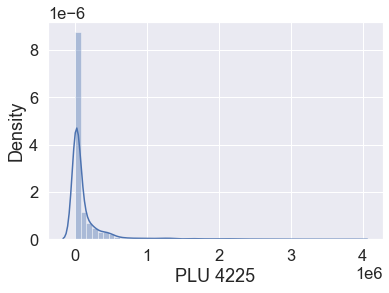

In [217]:
sns.distplot(df_new['PLU 4225'])

<AxesSubplot:xlabel='PLU 4770', ylabel='Density'>

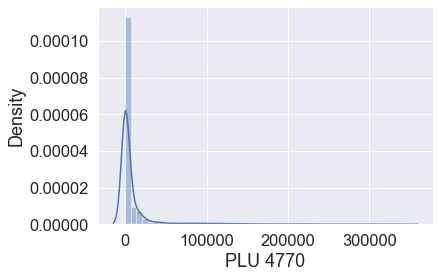

In [218]:
sns.distplot(df_new['PLU 4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

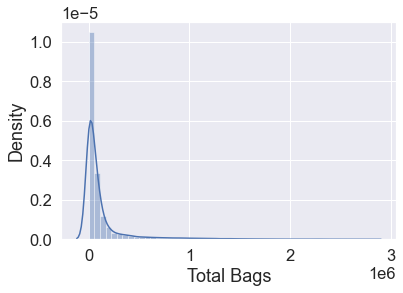

In [219]:
sns.distplot(df_new['Total Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

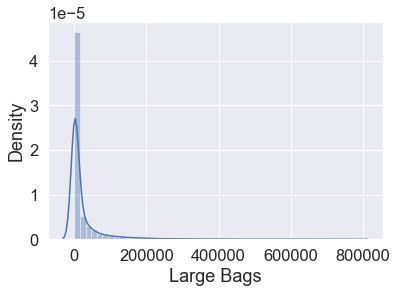

In [220]:
sns.distplot(df_new['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

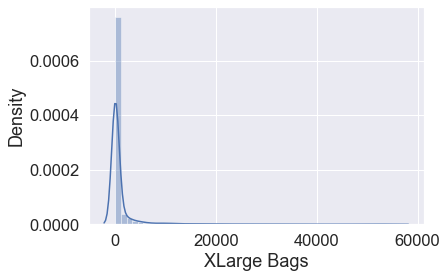

In [221]:
sns.distplot(df_new['XLarge Bags'])

In [169]:
x1= df_new1.drop(['region','Day'], axis = 1)
y1=df_new1['region']

In [170]:
x1

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,11
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,11
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,11
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,11
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,1,3,1
18245,124,5233,4653,4757,0,5955,5864,2340,0,1,3,0
18246,140,5203,4654,3928,4712,5985,5961,818,0,1,3,0
18247,146,5616,5183,4402,4710,6360,6284,901,0,1,3,0


In [171]:
y1

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18118, dtype: int32

In [172]:
print(y1.value_counts())

38    338
51    338
39    338
23    338
22    338
6     338
5     338
52    338
4     338
35    338
9     338
19    338
34    338
18    338
2     338
49    338
32    338
16    338
8     338
0     338
25    338
27    338
15    338
46    338
30    338
45    338
29    338
13    338
44    338
12    338
11    338
10    338
26    338
20    337
28    337
1     337
50    336
14    336
41    336
40    336
33    336
24    335
31    335
21    333
48    333
53    332
7     332
17    331
36    330
3     329
37    328
47    328
43    326
42    301
Name: region, dtype: int64


In [173]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method="yeo-johnson")

In [174]:
x1

array([[-0.08366724, -0.12425495, -0.68252574, ..., -0.99263119,
        -1.3051586 ,  1.47090794],
       [-0.03152475, -0.17770825, -0.85769918, ..., -0.99263119,
        -1.3051586 ,  1.47090794],
       [-1.25787524,  0.14000544, -0.79345482, ..., -0.99263119,
        -1.3051586 ,  1.47090794],
       ...,
       [ 1.19146654, -0.66111501, -0.62338354, ...,  1.00742351,
         1.69981455, -1.68436028],
       [ 1.31971924, -0.57541241, -0.51145542, ...,  1.00742351,
         1.69981455, -1.68436028],
       [ 0.63148497, -0.54005461, -0.24085186, ...,  1.00742351,
         1.69981455, -1.68436028]])

In [175]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x1=mn.fit_transform(x1)
x1

array([[0.56519558, 0.55189092, 0.41213899, ..., 0.        , 0.        ,
        1.        ],
       [0.5734903 , 0.53760319, 0.3646657 , ..., 0.        , 0.        ,
        1.        ],
       [0.37840486, 0.62252608, 0.38207639, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.76804137, 0.40839157, 0.42816696, ..., 1.        , 1.        ,
        0.        ],
       [0.78844356, 0.43129934, 0.4585003 , ..., 1.        , 1.        ,
        0.        ],
       [0.67896059, 0.44075026, 0.53183585, ..., 1.        , 1.        ,
        0.        ]])

In [176]:
print(x1.shape)
print(y1.shape)

(18118, 12)
(18118,)


In [177]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=42,test_size=0.20)

In [178]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14494, 12)
(14494,)
(3624, 12)
(3624,)


In [179]:
from imblearn.over_sampling import SMOTE

In [180]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [181]:
x_train

array([[0.56935244, 0.82658105, 0.88657141, ..., 0.        , 0.74244516,
        0.72133825],
       [0.53553835, 0.96162248, 0.81278153, ..., 0.        , 0.        ,
        0.27121776],
       [0.58579278, 0.20907074, 0.20730929, ..., 1.        , 0.42815572,
        0.14989302],
       ...,
       [0.55639436, 0.46262605, 0.50025826, ..., 1.        , 0.74244516,
        0.14989302],
       [0.8072853 , 0.37836605, 0.48692726, ..., 1.        , 0.74244516,
        0.91068953],
       [0.83208676, 0.34967852, 0.47762488, ..., 1.        , 0.74244516,
        0.86974501]])

In [182]:
y_train

0        41
1        29
2        39
3        49
4        46
         ..
15277    53
15278    53
15279    53
15280    53
15281    53
Name: region, Length: 15282, dtype: int32

In [183]:
np.bincount(y_train)

array([283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283, 283,
       283, 283], dtype=int64)

In [184]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [185]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.45445622300745975


In [186]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [ 9 38 45 ... 10 29 15]
actual score: 12643    13
11106    38
14295    45
3073      5
5617      0
         ..
17082    44
13913    38
1368     26
16325    29
9004     43
Name: region, Length: 3624, dtype: int32


In [187]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy_score: 0.4279801324503311
[[27  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  1]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ... 39 23  0]
 [ 0  2  0 ...  0  0 11]]
              precision    recall  f1-score   support

           0       0.33      0.46      0.38        59
           1       0.20      0.35      0.26        68
           2       0.73      0.43      0.54        75
           3       0.35      0.32      0.34        68
           4       0.43      0.39      0.41        74
           5       0.48      0.39      0.43        80
           6       0.56      0.69      0.62        64
           7       0.47      0.58      0.52        69
           8       0.60      0.75      0.67        77
           9       0.45      0.80      0.58        75
          10       0.20      0.19      0.20        62
          11       0.39      0.50      0.44        78
          12       0.41      0.57      0.48        65
          13       0.04      0.02      0.02        6

In [200]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.5070671211721722


In [190]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [191]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [192]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [194]:
fun(svc)

Accuracy:: 0.7381346578366446
confusion matrix
 [[56  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  1  0]
 [ 0  0  0 ...  6 40  0]
 [ 0  1  2 ...  0  0 34]]
classification report
               precision    recall  f1-score   support

           0       0.54      0.95      0.69        59
           1       0.44      0.47      0.45        68
           2       0.92      0.95      0.93        75
           3       0.70      0.74      0.72        68
           4       0.84      0.76      0.79        74
           5       0.90      0.69      0.78        80
           6       0.98      0.70      0.82        64
           7       0.79      0.75      0.77        69
           8       0.93      0.87      0.90        77
           9       0.64      0.84      0.72        75
          10       0.64      0.74      0.69        62
          11       0.79      0.82      0.81        78
          12       0.94      0.92      0.93        65
          13    

In [196]:
fun(knn)

Accuracy:: 0.7952538631346578
confusion matrix
 [[56  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 54  2  0]
 [ 0  0  0 ...  6 48  0]
 [ 0  1  3 ...  0  0 48]]
classification report
               precision    recall  f1-score   support

           0       0.71      0.95      0.81        59
           1       0.66      0.81      0.73        68
           2       0.83      0.92      0.87        75
           3       0.74      0.72      0.73        68
           4       0.93      0.93      0.93        74
           5       0.87      0.78      0.82        80
           6       0.74      0.89      0.81        64
           7       0.80      0.83      0.81        69
           8       0.97      0.84      0.90        77
           9       0.70      0.80      0.75        75
          10       0.74      0.74      0.74        62
          11       0.81      0.88      0.85        78
          12       0.90      0.83      0.86        65
          13    

In [193]:
fun(dtc)

Accuracy:: 0.8054635761589404
confusion matrix
 [[47  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  1]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  1  1 ...  0  0 41]]
classification report
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        59
           1       0.69      0.60      0.65        68
           2       0.86      0.91      0.88        75
           3       0.76      0.78      0.77        68
           4       0.77      0.88      0.82        74
           5       0.79      0.84      0.81        80
           6       0.94      0.95      0.95        64
           7       0.93      0.83      0.88        69
           8       0.96      0.86      0.90        77
           9       0.76      0.73      0.75        75
          10       0.79      0.79      0.79        62
          11       0.93      0.86      0.89        78
          12       0.86      0.85      0.85        65
          13    

In [197]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x1,y1)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_features='sqrt')
0.4941421437358451


In [198]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x1,y1)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'poly'}
SVC(kernel='poly')
0.7193827456200336


In [199]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[7,5,11],"weights":['uniform','distance'],"algorithm":['auto', 'brute']}
grid_search_cv = GridSearchCV(knn,param_grid=params)
grid_search_cv.fit(x1,y1)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(weights='distance')
0.4664960313035616


In [201]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [202]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [203]:
fun(rf)

Accuracy:: 0.9083885209713024
confusion matrix
 [[56  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  1 66  0]
 [ 0  0  0 ...  0  0 51]]
classification report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        59
           1       0.83      0.85      0.84        68
           2       0.97      1.00      0.99        75
           3       0.85      0.88      0.86        68
           4       0.95      0.99      0.97        74
           5       0.85      0.78      0.81        80
           6       0.95      0.98      0.97        64
           7       0.95      0.91      0.93        69
           8       0.99      0.99      0.99        77
           9       0.90      0.88      0.89        75
          10       0.88      0.84      0.86        62
          11       1.00      0.96      0.98        78
          12       0.97      0.97      0.97        65
          13    

In [204]:
fun(ad)

Accuracy:: 0.08719646799116998
confusion matrix
 [[ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0 30]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  0 11 ...  0 27  0]
 [ 0  0  0 ...  0 41  1]
 [ 0  0  0 ...  0  0 22]]
classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00        68
           2       0.12      0.48      0.20        75
           3       0.00      0.00      0.00        68
           4       0.27      0.27      0.27        74
           5       0.00      0.00      0.00        80
           6       0.00      0.00      0.00        64
           7       0.00      0.00      0.00        69
           8       0.00      0.00      0.00        77
           9       0.00      0.00      0.00        75
          10       0.00      0.00      0.00        62
          11       0.20      0.45      0.28        78
          12       0.00      0.00      0.00        65
          13   

In [205]:
#cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [206]:
for i in range(2,10):
    score=cross_val_score(lm,x1,y1,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.024119660006623248
At Value of 3 0.24042922621795706
At Value of 4 0.26333557057120727
At Value of 5 0.32051522374527713
At Value of 6 0.30302301757741806
At Value of 7 0.34949673282714094
At Value of 8 0.34463561045717983
At Value of 9 0.36218513240018446


In [207]:
score=cross_val_score(lm,x1,y1,cv=10)
score.mean()

0.3625709577112154

In [208]:
score=cross_val_score(dtc,x1,y1,cv=10)
score.mean()

0.6335072764794005

In [209]:
score=cross_val_score(svc,x1,y1,cv=10)
score.mean()

0.6313021174256414

In [210]:
score=cross_val_score(knn,x1,y1,cv=10)
score.mean()

0.4859779212879838

In [211]:
score=cross_val_score(rf,x1,y1,cv=10)
score.mean()

0.7713242168596862

In [212]:
score=cross_val_score(ad,x1,y1,cv=10)
score.mean()

0.051549093533142444

In [213]:
import pickle
filename="avocado1.pkl"
pickle.dump(rf,open(filename,'wb'))

In [214]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_avocado1=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [215]:
df_avocado1

,orginal,predicted
0,13,9
1,38,38
2,45,45
3,5,5
4,0,0
...,...,...
3619,44,44
3620,38,38
3621,26,26
3622,29,29
